In [ ]:
# 1. Grad Descent
# import modules
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math

In [ ]:
# import data for grad descent
import pylab as pl

def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('/Users/becca/Documents/Google Drive/Dropbox/Grad School/ML/code_hw1/P1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 

In [1]:
# define variables for gaussian and quadratic bowl functions
gaussMean = getData()[0]
gaussCov = getData()[1]
n = gaussMean.shape[0]
quadBowlA = getData()[2]
quadBowlB = getData()[3]

NameError: name 'getData' is not defined

In [40]:
# 1.1 define grad descent function
def grad_descent(x_init, alpha, thresh, f, f_prime):
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while((abs(f(prev)-f(next))) >= thresh):
        prev = next
        next = prev - alpha*f_prime(prev)
        iter += 1
        
    return (next, f(next), iter)
    #print "Iterations = ", iter

In [ ]:
# Quadratic Bowl functions
quad = lambda x: 0.5 * np.dot(np.dot(x, quadBowlA), x.T) - np.dot(x, quadBowlB)
quad_prime = lambda x: np.dot(quadBowlA, x.T) - quadBowlB

In [25]:
x = np.array([26.667, 26.667])
grad_descent(x+1, 0.1, 1e-4, quad, quad_prime)

array([    26.66617822,     26.66455078, -10666.66663792])

In [112]:
# Gaussian functions
from operator import truediv
gauss = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
gauss_prime = lambda x: np.dot(np.dot(-gauss(x), inv(gaussCov)), (x-gaussMean))

In [174]:
# Gaussian functions - 1
from operator import truediv
gauss1 = lambda x: -1/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
gauss_prime1 = lambda x: np.dot(np.dot(-gauss1(x), inv(gaussCov)), (x-gaussMean))

In [121]:
x = np.array([10, 10])
grad_descent(x+1, 1e-3, 1e-10, gauss, gauss_prime)

(array([ 10.,  10.]), -10000.0, 4)

In [ ]:
#Discuss (and illustrate) the effect of the choice of starting guess
#done
#, the step size, 
#and theconvergence criterion on the resulting solution, 
#as well as how the norm of the gradient evolvesthrough the iteration

In [886]:
# Data for norm vs iter - ss1
x = np.array([10, 10])
norm, iterations = grad_descent_norm(x+3, 5e-4, 1e-10, gauss, gauss_prime)
normg = norm
iterationsg = iterations
x = np.array([26.667, 26.667])
normq, iterationsq = grad_descent_norm(x+3, 5e-4, 1e-10, quad, quad_prime)

In [887]:
# Data for norm vs iter - ss2
x = np.array([10, 10])
norm, iterations = grad_descent_norm(x+3, 3e-4, 1e-10, gauss, gauss_prime)
normgstep = norm
iterationsgstep = iterations
x = np.array([26.667, 26.667])
normqstep, iterationsqstep = grad_descent_norm(x+3, 3e-4, 1e-10, quad, quad_prime)

In [888]:
# Data for norm vs iter - ss3
x = np.array([10, 10])
norm, iterations = grad_descent_norm(x+3, 9e-5, 1e-10, gauss, gauss_prime)
normgstep2 = norm
iterationsgstep2 = iterations
x = np.array([26.667, 26.667])
normqstep2, iterationsqstep2 = grad_descent_norm(x+3, 9e-5, 1e-10, quad, quad_prime)

In [891]:
#fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(15,5), dpi=300)
plt.plot(np.array(iterationsq)/float(max(iterationsq)), (normq)/max(normq), 'c-', label = 'QB (5e-4)')
plt.plot(np.array(iterationsg)/float(max(iterationsg)), (normg)/max(normg), 'r-', label = 'NG (5e-4)')
plt.plot(np.array(iterationsqstep)/float(max(iterationsq)), (normqstep)/max(normq), 'c--', label = 'QB (3e-4)')
plt.plot(np.array(iterationsgstep)/float(max(iterationsg)), (normgstep)/max(normg), 'r--', label = 'NG (3e-4)')
plt.plot(np.array(iterationsqstep2)/float(max(iterationsq)), (normqstep2)/max(normq), 'c--',dashes=(5, 6), label = 'QB (9e-5)')
plt.plot(np.array(iterationsgstep2)/float(max(iterationsg)), (normgstep2)/max(normg), 'r--',dashes=(5, 6), label = 'NG (9e-5)')
plt.xlabel('Normalized Iteration')
plt.ylabel('Normalized Avg Gradient Norm')
plt.legend(loc='upper right', title = '')
#plt.show()
fig.savefig('GaussQuad norm iter rectang.jpg', bbox_inches='tight')
# CONCLUSION: smaller step size yields larger iterations, descent less steep

In [837]:
#Quad
# generate data for var init wts:
iterationsq = []
xestq = []
deltaq = []
j = 0
x = np.array([26.667, 26.667])
for i in xrange(8):
    xestq.append(grad_descent(x+i, 1e-3, 1e-10, quad, quad_prime)[0])
    iterationsq.append(grad_descent(x+i, 1e-3, 1e-10, quad, quad_prime)[2])
    deltaq.append(sum((xestq[j]-x)**2))
    
    j += 1

In [838]:
# Gauss
iterationsg = []
xestg = []
deltag = []
x = np.array([10, 10])
j = 0
for i in xrange(8):
    xestg.append(grad_descent(x+i, 1e-3, 1e-10, gauss, gauss_prime)[0])
    iterationsg.append(grad_descent(x+i, 1e-3, 1e-10, gauss, gauss_prime)[2])
    deltag.append(sum((xestg[j]-x)**2))
    
    j+=1

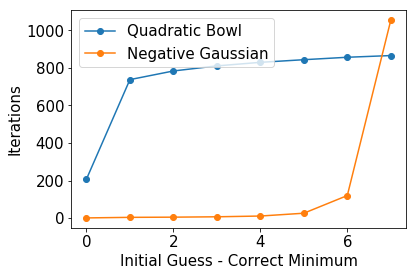

In [839]:
#  plot var init weights with iter
x = xrange(8)

plt.rcParams.update({'font.size': 15})
#fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), iterationsq, 'o-', label = 'Quadratic Bowl')
plt.plot((x), iterationsg, 'o-', label = 'Negative Gaussian')
plt.xlabel('Initial Guess - Correct Minimum')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = '')
plt.show()
#fig.savefig('GaussQuad close iter.jpg', bbox_inches='tight')

In [ ]:
# plot var init weights with err
x = xrange(8)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot((x), deltaq, 'o--', label = 'Quadratic Bowl')
plt.plot((x), deltag, 'o--', label = 'Negative Gaussian')
plt.xlabel('Initial Guess - Correct Minimum')
plt.ylabel('SSE')
plt.legend(loc='center left', title = '')
fig.savefig('GaussQuad close err.jpg', bbox_inches='tight')
# Conclusion: Gaussian fewer iterations at first and similar error

In [850]:
x=np.array([10,10])
grad_descent(x+8, 1e-2, 1e-4, gauss, gauss_prime)

(array([ 17.99977914,  17.99977914]), -0.027627244322483483, 1)

In [903]:
#Quad
# generate data for var init wts:
iterationsq = []
xestq = []
deltaq = []
j = 0
x = np.array([26.667, 26.667])
for i in [10, 100, 1000, 10**4, 10**5, 10**6]:
    xestq.append(grad_descent(x+i, 1e-3, 1e-4, quad, quad_prime)[0])
    iterationsq.append(grad_descent(x+i, 1e-3, 1e-4, quad, quad_prime)[2])
    deltaq.append(sum((xestq[j]-x)**2))
    j += 1
# Gauss
iterationsg = []
xestg = []
deltag = []
x = np.array([10, 10])
j = 0
for i in [10, 100, 1000, 10**4, 10**5, 10**6]:
    xestg.append(grad_descent(x+i, 1e-3, 1e-4, gauss, gauss_prime)[0])
    iterationsg.append(grad_descent(x+i, 1e-3, 1e-4, gauss, gauss_prime)[2])
    deltag.append(sum((xestg[j]-x)**2))
    j+=1

In [913]:
x = np.array([26.667, 26.667])
grad_descent_norm(x+10, 1e-3, 1e-4, quad, quad_prime)

([205.82266355978322,
  202.73532360638643,
  199.6942937522908,
  196.69887934600629,
  193.74839615581618,
  190.84217021347899,
  187.97953766027683,
  185.15984459537245,
  182.38244692644207,
  179.64671022254538,
  176.95200956920726,
  174.2977294256691,
  171.68326348428388,
  169.10801453201978,
  166.57139431403937,
  164.07282339932863,
  161.61173104833895,
  159.18755508261387,
  156.79974175637466,
  154.44774563002915,
  152.13102944557866,
  149.84906400389494,
  147.60132804383645,
  145.387308123179,
  143.2064985013312,
  141.05840102381126,
  138.942525008454,
  136.85838713332723,
  134.80551132632721,
  132.78342865643242,
  130.79167722658596,
  128.82980206818715,
  126.89735503716433,
  124.99389471160679,
  123.11898629093275,
  121.2722014965687,
  119.45311847412019,
  117.66132169700836,
  115.89640187155321,
  114.15795584348001,
  112.44558650582785,
  110.75890270824036,
  109.09751916761691,
  107.46105638010263,
  105.84914053440109,
  104.261403426385

In [908]:
#plot var init weights
x = [10, 100, 1000, 10**4, 10**5, 10**6]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot(np.log10(x), iterationsq, 'o-', label = 'Quadratic Bowl')
plt.plot(np.log10(x), iterationsg, 'o-', label = 'Negative Gaussian')
plt.xlabel('log(Initial Guess - Correct Minimum)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = '')
fig.savefig('GaussQuad far iter.jpg', bbox_inches='tight')

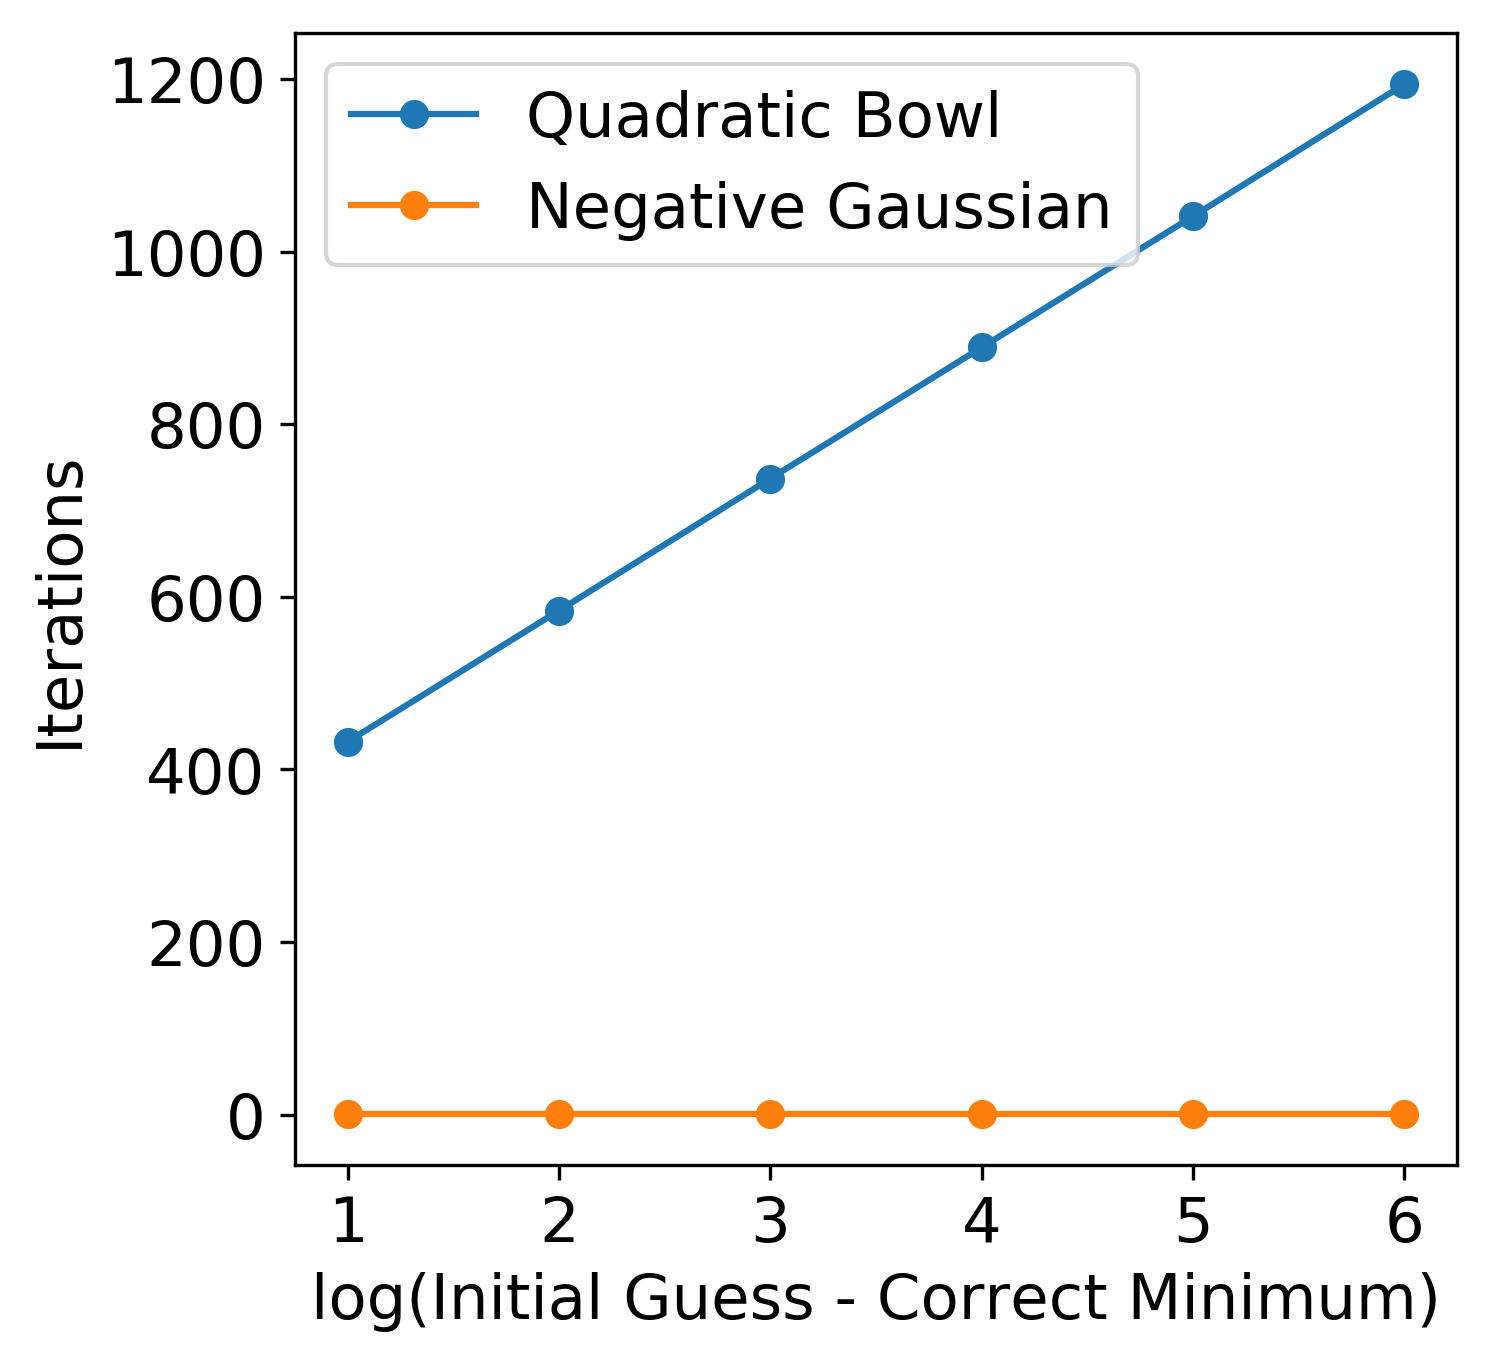

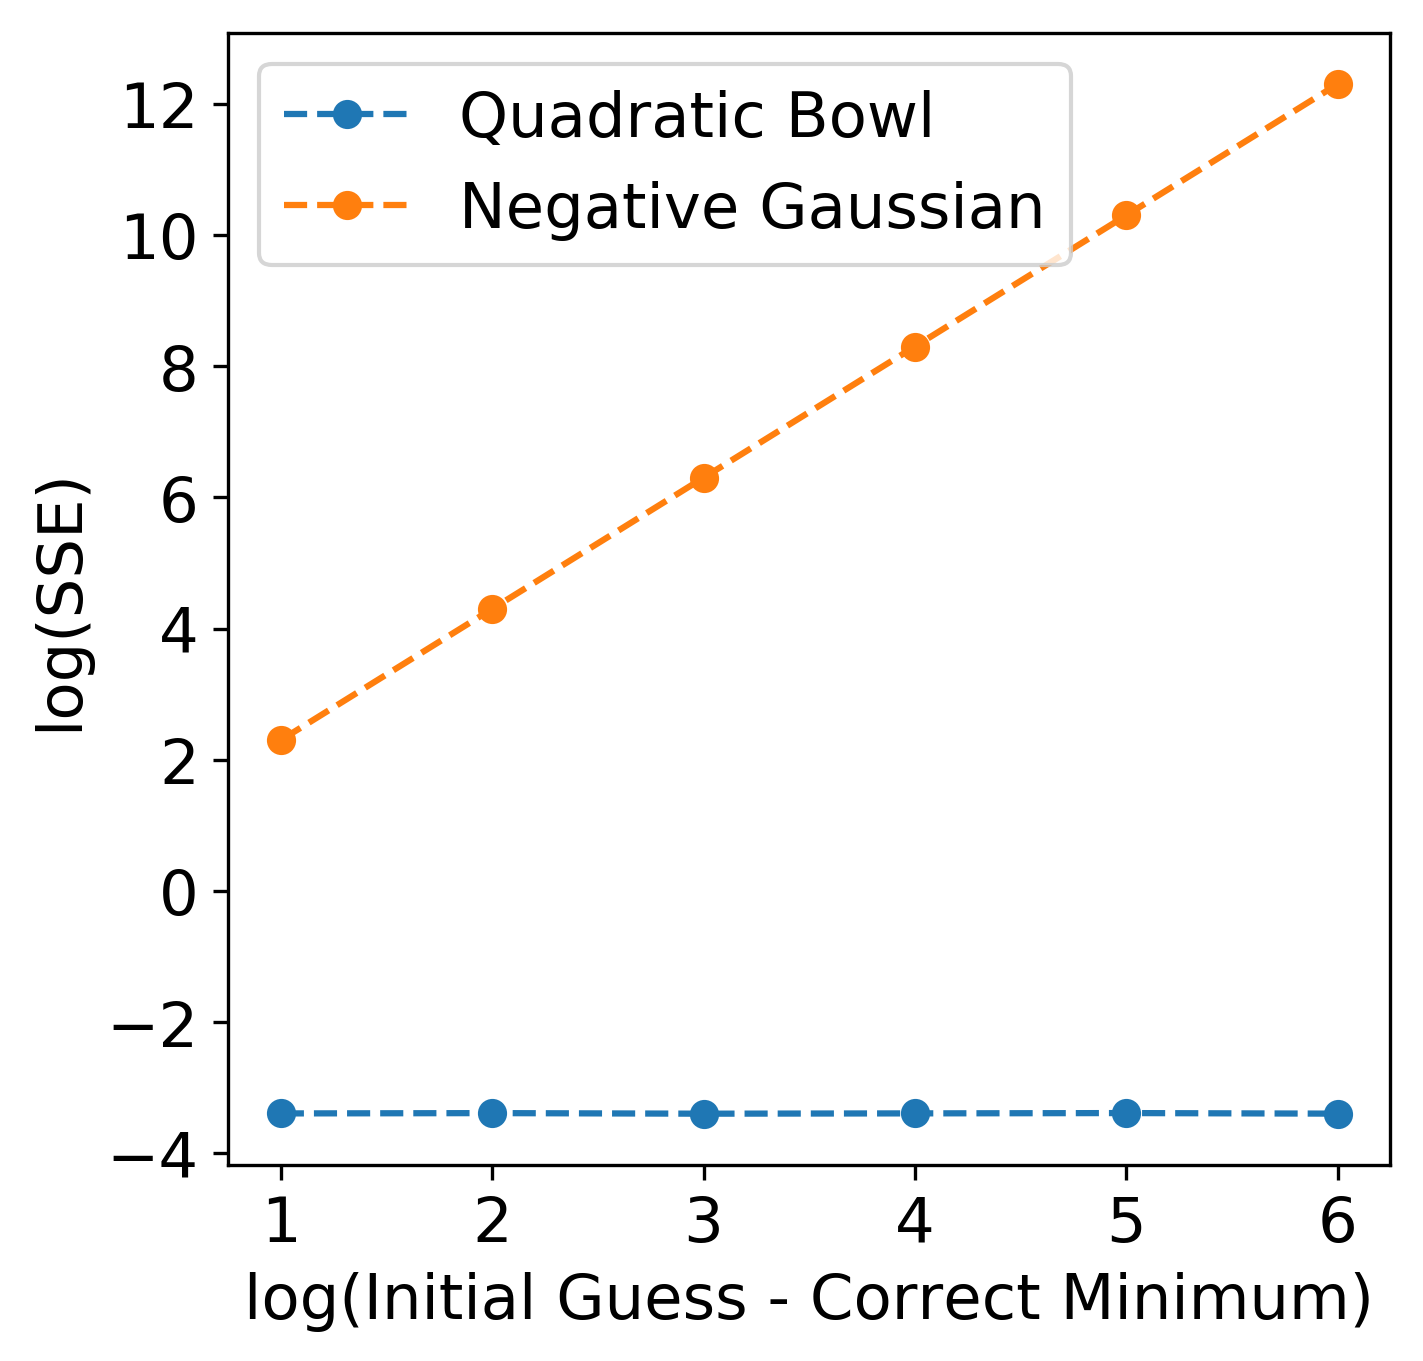

In [909]:
# plot errors
x = [10, 100, 1000, 10**4, 10**5, 10**6]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot(np.log10(x), np.log10(deltaq), 'o--', label = 'Quadratic Bowl')
plt.plot(np.log10(x), np.log10(deltag), 'o--', label = 'Negative Gaussian')
plt.xlabel('log(Initial Guess - Correct Minimum)')
plt.ylabel('log(SSE)')
plt.legend(loc='upper left', title = '')
plt.show()
fig.savefig('GaussQuad far err.jpg', bbox_inches='tight')

# Conclusion: Gaussian fewer iterations but worse error at larger numbers away from true

In [617]:
#Quad
# generate data for var step size:
iterationsqss = []
xestq = []
deltaqss = []
j = 0
x = np.array([26.667, 26.667])
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    xestq.append(grad_descent(x+1, i, 1e-4, quad, quad_prime)[0])
    iterationsqss.append(grad_descent(x+1, i, 1e-4, quad, quad_prime)[2])
    deltaqss.append(sum((xestq[j]-x)**2))
    j += 1
# Gauss
iterationsgss = []
xestg = []
deltagss = []
x = np.array([10, 10])
j = 0
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    xestg.append(grad_descent(x+1, i, 1e-4, gauss, gauss_prime)[0])
    iterationsgss.append(grad_descent(x+1, i, 1e-4, gauss, gauss_prime)[2])
    deltagss.append(sum((xestg[j]-x)**2))
    j+=1

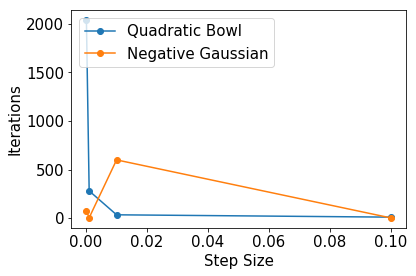

In [619]:
# plot step size with iter
x = [1e-4, 1e-3, 1e-2, 1e-1] 

#fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot((x), iterationsqss, 'o-', label = 'Quadratic Bowl')
plt.plot((x), iterationsgss, 'o-', label = 'Negative Gaussian')
plt.xlabel('Step Size')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = '')
plt.show()
#fig.savefig('GaussQuad step size iter.jpg', bbox_inches='tight')

In [622]:
#plot var step size with error 
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot((x), deltaqss, 'o--', label = 'Quadratic Bowl')
plt.plot((x), deltagss, 'o--', label = 'Negative Gaussian')
plt.xlabel('Step Size')
plt.ylabel('SSE')
plt.legend(loc='upper left', title = '')
fig.savefig('GaussQuad step size err.jpg', bbox_inches='tight')

In [627]:
#Quad
# generate data for var convergence criterion:
iterationsqcc = []
xestq = []
deltaqcc = []
j = 0
x = np.array([26.667, 26.667])
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    xestq.append(grad_descent(x+1, 1e-3, i, quad, quad_prime)[0])
    iterationsqcc.append(grad_descent(x+1, 1e-3, i, quad, quad_prime)[2])
    deltaqcc.append(sum((xestq[j]-x)**2))
    j += 1
# Gauss
iterationsgcc = []
xestg = []
deltagcc = []
x = np.array([10, 10])
j = 0
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    xestg.append(grad_descent(x+1, 1e-3, i, gauss, gauss_prime)[0])
    iterationsgcc.append(grad_descent(x+1, 1e-3, i, gauss, gauss_prime)[2])
    deltagcc.append(sum((xestg[j]-x)**2))
    j+=1

In [632]:
# plot conv crit with iter
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot((x), iterationsqcc, 'o-', label = 'Quadratic Bowl')
plt.plot((x), iterationsgcc, 'o-', label = 'Negative Gaussian')
plt.xlabel('Convergence Criterion')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = '')
fig.savefig('GaussQuad conv crit iter.jpg', bbox_inches='tight')

In [630]:
#plot conv crit with error
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 15})
plt.plot((x), deltaqcc, 'o--', label = 'Quadratic Bowl')
plt.plot((x), deltagcc, 'o--', label = 'Negative Gaussian')
plt.xlabel('Convergence Criterion')
plt.ylabel('SSE')
plt.legend(loc='upper left', title = '')
fig.savefig('GaussQuad conv crit err.jpg', bbox_inches='tight')

In [586]:
# 1.1 define grad descent function
def grad_descent_norm(x_init, alpha, thresh, f, f_prime):
    iterations = []
    norm = []
    iter = 0
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while((abs(f(prev)-f(next))) >= thresh):
        prev = next
        next = prev - alpha*f_prime(prev)
        norm.append(np.linalg.norm(f_prime(next)))
        iterations.append(iter)
        iter += 1
    return (norm, iterations)
    #print "Iterations = ", iter

 The gradient function may not always look as simple and clean as the ones provided above. Acommon way to check if one’s gradient evaluation is correct or not is to use the central differ-ence approximation (see the “Finite difference” article in Wikipedia) to numerically evaluatethe gradient at various points.  Write code to approximate the gradient of a function numeri-cally at a given point using this method.  Verify the gradient values on the functions you usedin the question above by comparing the closed-form and numerical gradients at various points.Discuss  the  effect  of  changing  the  difference  step  (or  “δ”)  on  the  accuracy  of  the  gradientevaluation.
 
 


In [509]:
# Gaussian functions
from operator import truediv
gauss = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
gauss_prime = lambda x: np.dot(np.dot(-gauss(x), inv(gaussCov)), (x-gaussMean))

In [679]:
# 1.2. Numerical Gradient Evaluation
# Gaussian functions
gauss = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
#delta = np.array([1e-10, 1e-10])
gauss_primenum = lambda x, delta: 0.5*np.array([((gauss(np.array([x[0]+0.5*delta, x[1]]))-gauss(np.array([x[0]-0.5*delta, x[1]])))/delta)[0],
    ((gauss(np.array([x[1]+0.5*delta, x[0]]))-gauss(np.array([x[1]-0.5*delta, x[0]])))/delta)[1]]) 
#added 0.5 bc they dropped 2 in their derivative


In [681]:
x = np.array([11, 6])
gauss_prime(x)

array([ 182.68352405, -730.73409621])

In [682]:
gauss_primenum(x, np.array([1e-12, 1e-12]))

array([ 182.35368771, -730.89267971])

In [801]:
# Quadratic Bowl functions
quad = lambda x: 0.5 * np.dot(np.dot(x, quadBowlA), x.T) - np.dot(x, quadBowlB)
quad_primenum = lambda x, delta: np.array([((quad(np.array([x[0]+0.5*delta, x[1]]))-quad(np.array([x[0]-0.5*delta, x[1]])))/delta)[0],
    ((quad(np.array([x[1]+0.5*delta, x[0]]))-quad(np.array([x[1]-0.5*delta, x[0]])))/delta)[1]])

In [582]:
x = np.array([28, 28])
quad_prime(x)

array([ 20.,  20.])

In [583]:
quad_primenum(x, np.array([1e-10, 1e-10]))

array([[ -1.40000000e+13,  -3.36000000e+13],
       [ -1.40000000e+13,  -3.36000000e+13]])

In [672]:
x = np.array([60, 55])
quad_prime(x)

array([ 475.,  450.])

In [ ]:
delta = np.array([1e-10, 1e-10])
quad_primenum(x, delta)

In [817]:
delta = np.array([5, 5])
x = np.array([10, 10])
analg = []
numg = []
for i in xrange(1,30):
    analg.append(np.mean(gauss_prime(x+i), axis = 0))
    numg.append(np.mean(gauss_primenum(x+i, delta), axis = 0))
    
x = np.array([26.667, 26.667])
analq = []
numq = []
for i in xrange(1,30):
    analq.append(np.mean(quad_prime(x+i), axis = 0))
    numq.append(np.mean(quad_primenum(x+i, delta), axis = 0))
    
delta = np.array([20, 20])
x = np.array([10, 10])
analgd2 = []
numgd2 = []
for i in xrange(1,30):
    analgd2.append(np.mean(gauss_prime(x+i), axis = 0))
    numgd2.append(np.mean(gauss_primenum(x+i, delta), axis = 0))
    
x = np.array([26.667, 26.667])
analqd2 = []
numqd2 = []
for i in xrange(1,30):
    analqd2.append(np.mean(quad_prime(x+i), axis = 0))
    numqd2.append(np.mean(quad_primenum(x+i, delta), axis = 0))

In [820]:
#Analytical vs num delta = 10
x = xrange(1,30)

fig = plt.figure(figsize=(5,5), dpi=300)
plt.rcParams.update({'font.size': 14})
plt.plot((x), np.log10(analg), 'r-', label = 'NG Anal')
plt.plot((x), np.log10(numg), 'r--', label = 'NG Num (d = 5)')
plt.plot((x), np.log10(numgd2), 'r--', dashes = (5,6), label = 'NG Num (d = 20)')
plt.plot((x), np.log10(analq), 'c-', linewidth = 4, label = 'QB Anal', alpha = 0.8)
plt.plot((x), np.log10(numq), 'b--', label = 'QB Num (d = 5)')
plt.plot((x), np.log10(numqd2), 'b--', dashes = (5,6), label = 'QB Num (d = 20)')


plt.xlabel('Initial Guess - Correct Minimum')
plt.ylabel('Gradient')
plt.legend(loc='lower left', title = '')
fig.savefig('GaussQuad numderiv init guess.jpg', bbox_inches='tight')